In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns

In [2]:
#Read the data and check out the top 5 values
df= pd.read_csv('movies.csv')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#data information and description
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None


In [4]:
#It is clear that the dataset has some null values 
#The nest task involes finding out the number of null values per row
for column in df.columns:
    pct_missing = np.mean(df[column].isnull())
    print(f'{column} - {pct_missing}%')
# the results show that there is not a lot of missing value in comparison to the overall data but for the further analysis I will drop the rows with null values
df.dropna(inplace=True)    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
#Data types for the column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Type casting columns 
df.budget = df.budget.astype('int64')
df.gross = df.gross.astype('int64')
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [7]:
#extract year from released column and check wheather it is equal to the year column or not
# create correct year column
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.loc[df['yearcorrect']!=df['year']]
# as year column does not have correct values we will use yearcorrect from now on

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109.0,1984
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219.0,1981
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97.0,1981
96,The Evil Dead,NC-17,Horror,1981,"April 15, 1983 (United States)",7.5,192000.0,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000,2956630,Renaissance Pictures,85.0,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,Stan & Ollie,PG,Biography,2018,"January 11, 2019 (United Kingdom)",7.2,34000.0,Jon S. Baird,Jeff Pope,Steve Coogan,United Kingdom,10000000,24420923,Entertainment One,98.0,2019
7432,Dragon Ball Super: Broly,PG,Animation,2018,"January 16, 2019 (United States)",7.8,24000.0,Tatsuya Nagamine,Akira Toriyama,Masako Nozawa,Japan,8500000,115757940,Toei Company,100.0,2019
7462,1917,R,Drama,2019,"January 10, 2020 (United States)",8.3,473000.0,Sam Mendes,Sam Mendes,Dean-Charles Chapman,United States,95000000,384623579,Dreamworks Pictures,119.0,2020
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112.0,2020


In [8]:
#View heighest grossing movies
df.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


In [9]:
# Drop any Duplicate value
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [10]:
#Budget Correlation
# company

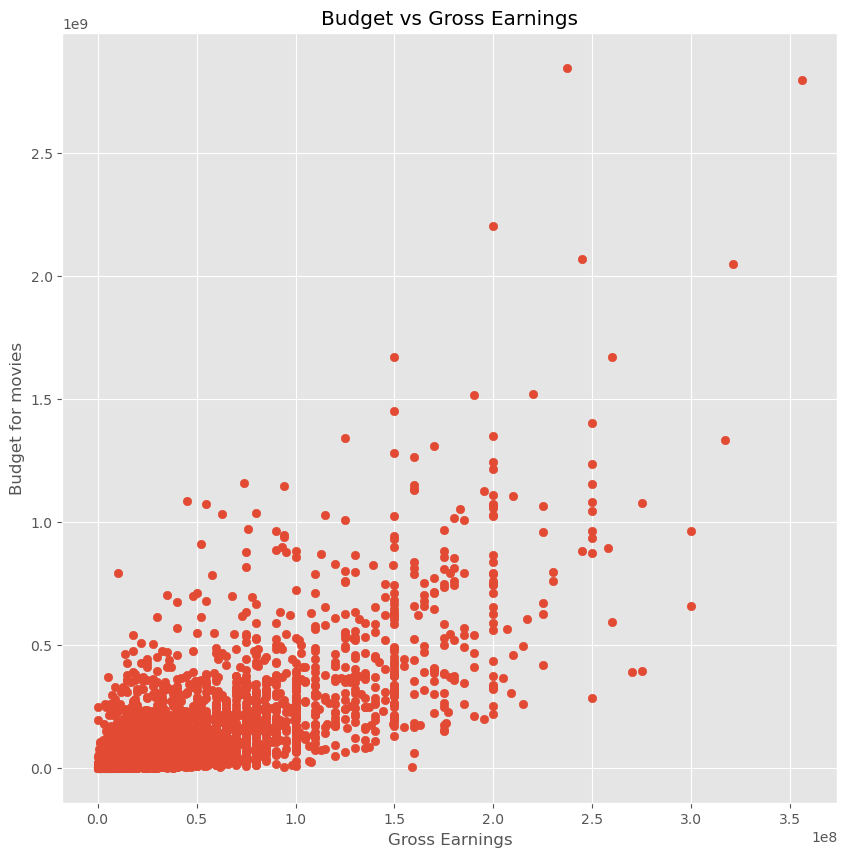

In [11]:
figure(figsize=(10,10))
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for movies')
plt.show()

Text(0, 0.5, 'Score for movies')

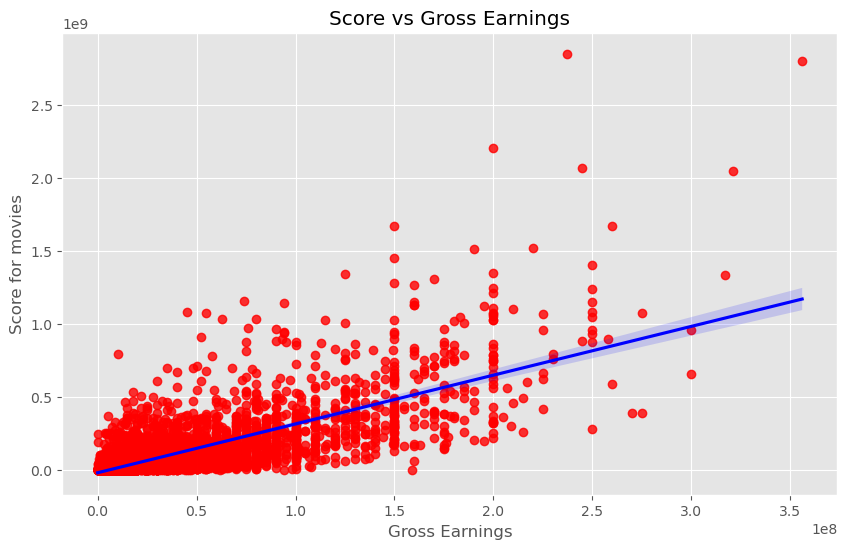

In [12]:
# plot the budget vs Gross using seaborn
figure(figsize=(10,6))
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title('Score vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Score for movies')

/var/folders/4g/qxn2t9595qx4_14vcb3q1sdc0000gn/T/ipykernel_76953/2838409682.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),annot=True)


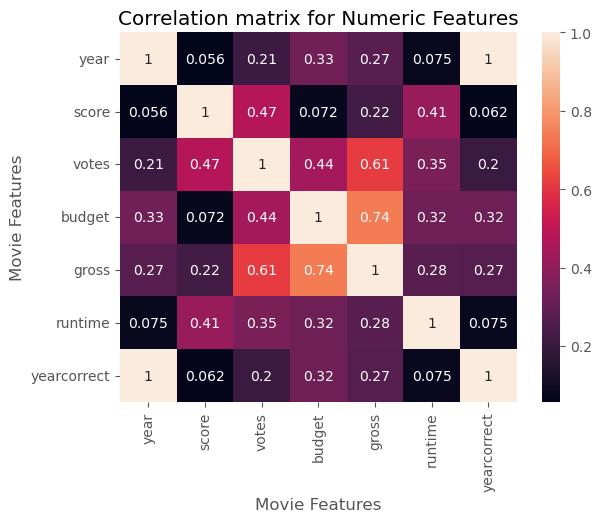

In [13]:
#Let's check the actual correlation values
#Pearson correlation
sns.heatmap(df.corr(method='pearson'),annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [14]:
#Countries with heighest earining movies
df.groupby('country').gross.sum().sort_values(ascending=False).head(10)

country
United States     470794726099
United Kingdom     45351705966
France              6568533115
China               6305918953
New Zealand         6278354563
Canada              5734558085
Germany             5688083409
Australia           2800304264
Japan               2494214085
Hong Kong           1412222241
Name: gross, dtype: int64

In [15]:
#Companies with heighest earining movies
df.groupby('company').gross.sum().sort_values(ascending=False).head(10)

company
Warner Bros.             54610959970
Universal Pictures       51241105418
Columbia Pictures        42356430218
Paramount Pictures       40021704691
Twentieth Century Fox    39542573303
Walt Disney Pictures     35833650748
New Line Cinema          19612851164
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Dreamworks Pictures      11593807697
Name: gross, dtype: int64

In [16]:
#Director with heighest earining movies
df.groupby('director').gross.sum().sort_values(ascending=False).head(10)

director
Steven Spielberg     9629049370
Anthony Russo        6844248984
Peter Jackson        6618045788
Michael Bay          6451692798
James Cameron        6248088578
Christopher Nolan    5153547948
David Yates          5044548416
J.J. Abrams          4659375464
Tim Burton           4456348890
Ron Howard           4388092562
Name: gross, dtype: int64

In [17]:
#Genre with heighest earining movies
df.groupby('genre').gross.sum().sort_values(ascending=False).head(10)

genre
Action       237752868767
Comedy        88514817620
Animation     77865909110
Drama         52098564769
Adventure     43578711908
Crime         20017662162
Biography     19093930296
Horror        14261055032
Family         2074332587
Mystery        2004091467
Name: gross, dtype: int64

In [18]:
df.groupby('score').gross.sum().sort_values(ascending=False).head(10)

score
6.6    29402807297
6.4    25946062678
7.0    25426383497
7.3    25083032277
6.5    24841920024
6.9    23584180958
6.8    21580328583
6.2    21209592656
7.8    21043448005
6.7    20853894399
Name: gross, dtype: int64

Text(0, 0.5, 'Score for movies')

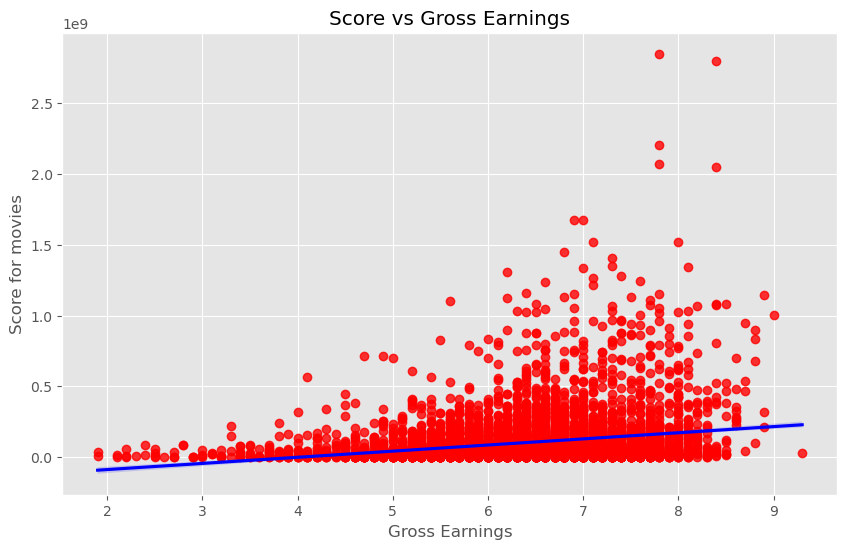

In [19]:
# plot the Score vs Gross using seaborn
figure(figsize=(10,6))
sns.regplot(x='score',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.title('Score vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Score for movies')
#The result is evident here that above a certain level score don't effect the gross earnings

In [24]:
year_gross = dict(zip(df.groupby(['yearcorrect']).gross.max().index,df.groupby(['yearcorrect']).gross.max().values))

In [49]:
movie_list_heighest = []

In [53]:
list_movie = df[['yearcorrect','gross','name']].values
for i in list_movie:
    if i[1] == year_gross[i[0]]:
        movie_list_heighest.append(i)

In [56]:
df_heighest_by_year = pd.DataFrame(movie_list_heighest,columns=[['year','gross','name']])

In [57]:
df_heighest_by_year

,year,gross,name
0,1980,538375067,Star Wars: Episode V - The Empire Strikes Back
1,1981,389925971,Indiana Jones and the Raiders of the Lost Ark
2,1982,792910554,E.T. the Extra-Terrestrial
3,1983,475106177,Star Wars: Episode VI - Return of the Jedi
4,1984,333107271,Indiana Jones and the Temple of Doom
5,1985,381906762,Back to the Future
6,1986,357288178,Top Gun
7,1987,320145693,Fatal Attraction
8,1988,354825435,Rain Man
9,1989,474171806,Indiana Jones and the Last Crusade
